# Validate End-to-End Distance

#### Import Modules

In [1]:
import os
import sys

cwd = os.getcwd()
parent_dir = cwd + "/../.."
sys.path.insert(1, parent_dir)

print("Directory containing the notebook:")
print(cwd)

Directory containing the notebook:
/Users/jwakim/Documents/WS_crosstalk_2024/chromo/simulations/validations


In [2]:
os.chdir(parent_dir)
print("Root Directory of Package: ")
print(os.getcwd())

Root Directory of Package: 
/Users/jwakim/Documents/WS_crosstalk_2024/chromo


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import chromo.mc as mc
from chromo.polymers import SSWLC
import chromo.binders
from chromo.fields import UniformDensityField
import chromo.mc.mc_controller as ctrl
from chromo.util.reproducibility import get_unique_subfolder_name
import chromo.util.poly_stat as ps

#### Specify (Null) Reader Proteins

In [4]:
null_binder = chromo.binders.get_by_name('null_reader')
binders = chromo.binders.make_binder_collection([null_binder])

#### Instantiate Polymer

In [5]:
num_beads = 500
bead_spacing = np.ones(num_beads-1) * 25
lp = 100

polymer = SSWLC.gaussian_walk_polymer(
    'poly_1',
    num_beads,
    bead_spacing,
    lp=lp,
    binder_names=np.array(["null_reader"])
)

No states defined.
No chemical modifications defined.


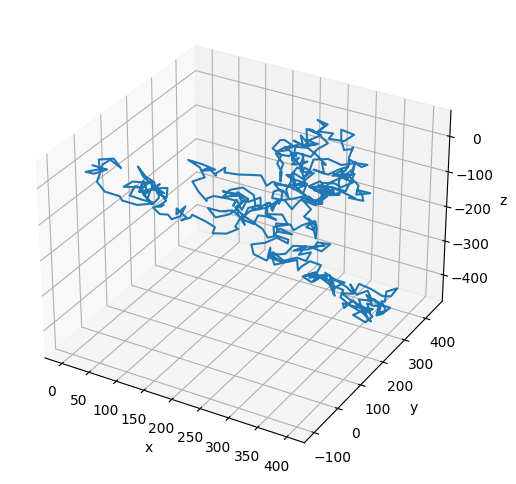

In [6]:
x = polymer.r[:, 0]
y = polymer.r[:, 1]
z = polymer.r[:, 2]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot3D(np.asarray(x), np.asarray(y), np.asarray(z))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### Define Field

In [7]:
n_bins_x = 63
n_bins_y = n_bins_x
n_bins_z = n_bins_x

x_width = 1000
y_width = x_width
z_width = x_width

udf = UniformDensityField(
    polymers = [polymer],
    binders = binders,
    x_width = x_width,
    nx = n_bins_x,
    y_width = y_width,
    ny = n_bins_y,
    z_width = z_width,
    nz = n_bins_z
)

#### Specify Simulation

In [8]:
amp_bead_bounds, amp_move_bounds = mc.get_amplitude_bounds(
    polymers = [polymer]
)

In [9]:
out_dir = "output_semiflex"
latest_sim = get_unique_subfolder_name(f"{out_dir}/sim_")
moves_to_use = ctrl.all_moves_except_binding_state(
    log_dir=latest_sim,
    bead_amp_bounds=amp_bead_bounds.bounds,
    move_amp_bounds=amp_move_bounds.bounds,
    controller=ctrl.SimpleControl
)

In [10]:
num_snapshots = 200
mc_steps_per_snapshot = 1000

In [11]:
mc.polymer_in_field(
    polymers = [polymer],
    binders = binders,
    field = udf,
    num_save_mc = mc_steps_per_snapshot,
    num_saves = num_snapshots,
    bead_amp_bounds = amp_bead_bounds,
    move_amp_bounds = amp_move_bounds,
    output_dir = out_dir,
    mc_move_controllers = moves_to_use
)

Save point 0 completed
Save point 1 completed
Save point 2 completed
Save point 3 completed
Save point 4 completed
Save point 5 completed
Save point 6 completed
Save point 7 completed
Save point 8 completed
Save point 9 completed
Save point 10 completed
Save point 11 completed
Save point 12 completed
Save point 13 completed
Save point 14 completed
Save point 15 completed
Save point 16 completed
Save point 17 completed
Save point 18 completed
Save point 19 completed
Save point 20 completed
Save point 21 completed
Save point 22 completed
Save point 23 completed
Save point 24 completed
Save point 25 completed
Save point 26 completed
Save point 27 completed
Save point 28 completed
Save point 29 completed
Save point 30 completed
Save point 31 completed
Save point 32 completed
Save point 33 completed
Save point 34 completed
Save point 35 completed
Save point 36 completed
Save point 37 completed
Save point 38 completed
Save point 39 completed
Save point 40 completed
Save point 41 completed
Sa

#### Evaluate Simulation

In [12]:
# TODO: Change this directory, if needed
sim_dir = latest_sim

# List (sorted) snapshots
snaps = os.listdir(sim_dir)
snaps = [snap for snap in snaps if snap.startswith("poly_") and snap.endswith(".csv")]
snap_inds = [int(snap.split(".")[0].split("-")[-1])for snap in snaps]
snaps = [snap for _, snap in sorted(zip(snap_inds, snaps))]
snap_inds = np.sort(snap_inds)
print(f"Snapshots: {snaps}")

Snapshots: ['poly_1-0.csv', 'poly_1-1.csv', 'poly_1-2.csv', 'poly_1-3.csv', 'poly_1-4.csv', 'poly_1-5.csv', 'poly_1-6.csv', 'poly_1-7.csv', 'poly_1-8.csv', 'poly_1-9.csv', 'poly_1-10.csv', 'poly_1-11.csv', 'poly_1-12.csv', 'poly_1-13.csv', 'poly_1-14.csv', 'poly_1-15.csv', 'poly_1-16.csv', 'poly_1-17.csv', 'poly_1-18.csv', 'poly_1-19.csv', 'poly_1-20.csv', 'poly_1-21.csv', 'poly_1-22.csv', 'poly_1-23.csv', 'poly_1-24.csv', 'poly_1-25.csv', 'poly_1-26.csv', 'poly_1-27.csv', 'poly_1-28.csv', 'poly_1-29.csv', 'poly_1-30.csv', 'poly_1-31.csv', 'poly_1-32.csv', 'poly_1-33.csv', 'poly_1-34.csv', 'poly_1-35.csv', 'poly_1-36.csv', 'poly_1-37.csv', 'poly_1-38.csv', 'poly_1-39.csv', 'poly_1-40.csv', 'poly_1-41.csv', 'poly_1-42.csv', 'poly_1-43.csv', 'poly_1-44.csv', 'poly_1-45.csv', 'poly_1-46.csv', 'poly_1-47.csv', 'poly_1-48.csv', 'poly_1-49.csv', 'poly_1-50.csv', 'poly_1-51.csv', 'poly_1-52.csv', 'poly_1-53.csv', 'poly_1-54.csv', 'poly_1-55.csv', 'poly_1-56.csv', 'poly_1-57.csv', 'poly_1-58.c

In [16]:
# Identify equilibrated snapshots
n_equilibrate = 180
snaps = np.array(snaps)
equilibrated_snaps = snaps[snap_inds >= n_equilibrate]

# Compute average squared end-to-end distances
n_beads = np.arange(1, 100)
seg_lengths = n_beads * bead_spacing[0] / (2 * lp)
e2e = []
for snap in equilibrated_snaps:
    e2e_snap = []
    snap_path = os.path.join(sim_dir, snap)
    r = pd.read_csv(snap_path, sep=",", header=[0, 1], index_col=0)["r"].to_numpy()
    for n_beads_ in n_beads:
        r1 = r[n_beads_:]
        r2 = r[:-n_beads_]
        e2e_snap.append(
            np.average(
                np.linalg.norm(r1 - r2, axis=1) ** 2
            ) / ((2 * lp)**2)
        )
    e2e.append(e2e_snap)
e2e = np.array(e2e)
e2e = np.average(e2e, axis=0)
assert len(e2e) == len(seg_lengths), "End-to-end distances do not align with segment lengths."

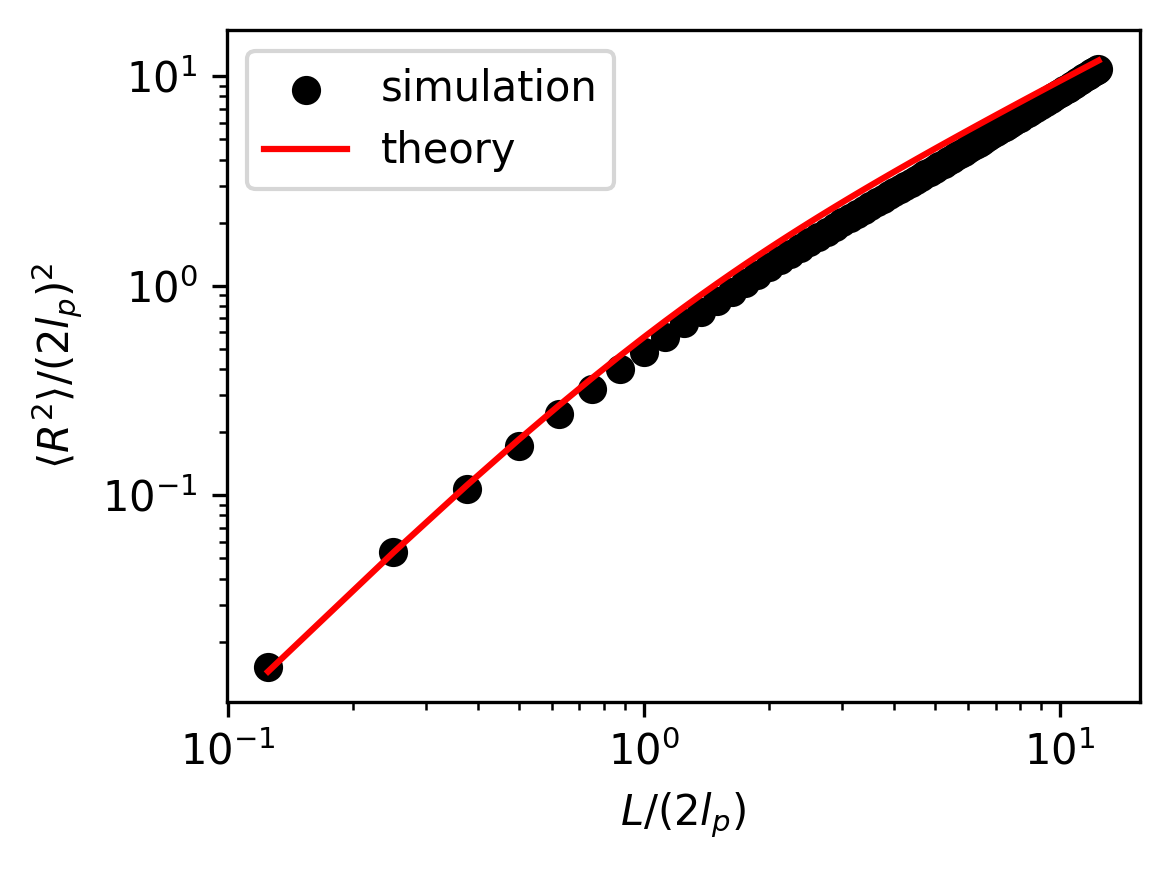

In [17]:
# Compute theoretical end-to-end distances
r2_theory = seg_lengths - 1/2 + np.exp(-2 * seg_lengths)/2

# Plot mean squared end-to-end distances
plt.figure(figsize=(4,3), dpi=300)
plt.scatter(seg_lengths, e2e, color="black", label="simulation")
plt.xlabel(r"$L/(2l_p)$")
plt.ylabel(r"$\langle R^2 \rangle /(2l_p)^2$")
plt.plot(seg_lengths, r2_theory, color="red", label="theory")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.show()